# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [ ]:
# I chose Q1 and Q5 with some work for Q2 but I was able to finish it in its entirety.

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 3.74 MiB/s, done.
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Spee

<Axes: >

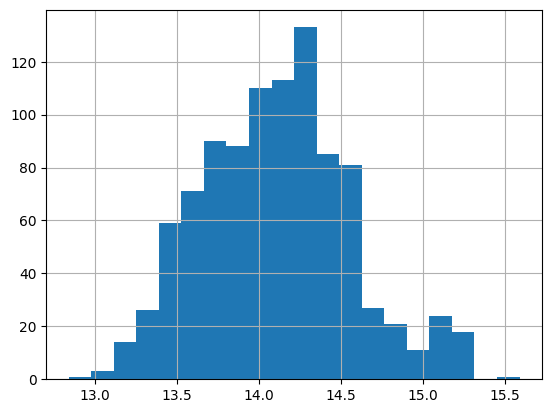

In [2]:
! git clone https://www.github.com/DS3001/assignment4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def pn(x):
  print(x,'\n')
  return

#1 - data loading and cleaning

cdf = pd.read_csv('./assignment4/data/cars_hw.csv')

print(cdf.head())
print(cdf.shape) #look at dimensions
print(cdf.columns.tolist()) #summarize variables
print(cdf.dtypes) #summarize variable datatypes

#sns.scatterplot(data=cdf,y='Price',x='Make') # definitely some outliers but I'm not sure I want to get rid of them - instead will rescale price using logs

# Take arcsinh transformation to rescale the variables
cdf['price_log'] = np.arcsinh(cdf['Price'])
#cdf['age_ihs'] = np.arcsinh(cdf['age'])
#sns.scatterplot(data=cdf,y='price_log',x='Make') # I can't tell a huge difference between this scatterplot and the previous one

cdf['price_log'].hist(bins=20) # this looks better in terms of outliers and scale

[14.08858648 14.12593212 14.27672568 13.62676843 13.84506936 14.00447666
 13.35664467 14.85861014 14.16616743 13.5721643  14.0192674  13.99449321
 14.47716707 15.25059508 14.10219213 14.54691645 14.35550656 14.35783485
 14.12299526 14.03865411 13.94126176 13.51710452 14.5819082  13.97592728
 13.58231667 13.91806715 14.49252836 13.82941346 13.97422225 14.06080691
 13.0689626  13.88503662 13.72339527 14.61031139 13.94829167 14.04503372
 14.17737203 14.37740945 14.25247433 14.32112261 13.87377947 13.50626431
 13.91082074 14.09314229 14.50665574 14.52058631 14.9384902  14.41214684
 13.83138391 13.63398868 14.18707411 14.48845503 14.28050165 13.67624849
 13.77676973 13.69221234 14.23290424 13.72119988 15.18770599 14.63793007
 14.42527613 15.06369162 13.94302388 13.63877338 13.76632031 13.95874473
 13.89432174 14.19394699 15.1372664  14.03384255 14.44358574 14.01272073
 13.62192581 14.05924074 14.29422613 13.981025   14.0794121  14.14337442
 14.8190793  14.26403516 14.04344263 14.3864901  14

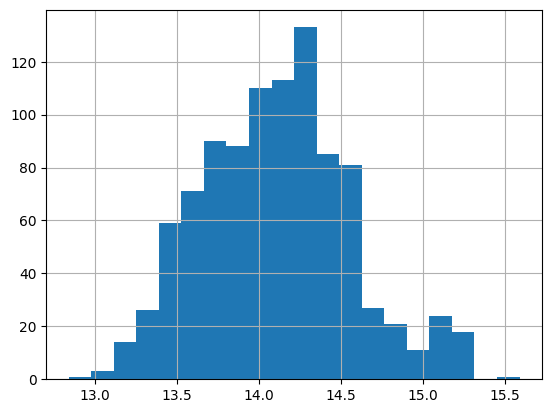

In [3]:
# 2 Summarize the Price variable and create a kernel density plot.
#Use .groupby() and .describe() to summarize prices by brand (Make).
#Make a grouped kernel density plot by Make.
#Which car brands are the most expensive? What do prices look like in general?

#summarizing Price (log version) variable
print(cdf['price_log'].unique(),'\n')
print(cdf.dtypes)
cdf['price_log'] = pd.to_numeric(cdf['price_log']) # it's already numeric I'm not sure why I did this
cdf['price_log'].hist(bins=20)
range_value = max(cdf['price_log']) - min(cdf['price_log']) # small difference in range
print(range_value)

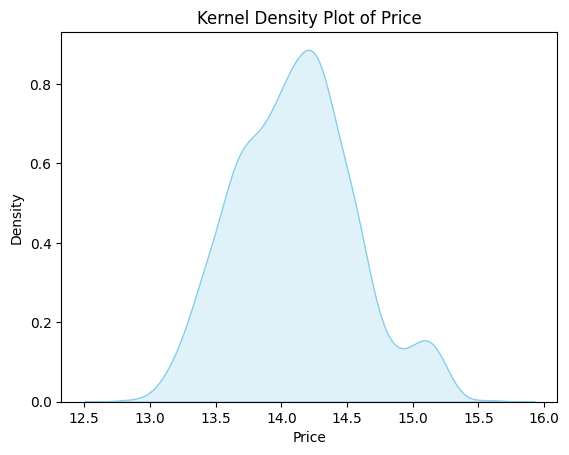

In [4]:
# Create a kernel density plot - should look similar to the plot above
sns.kdeplot(data = cdf['price_log'], fill=True, color='skyblue')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')

# Show the plot
plt.show()

# This data looks pretty good - majority of cars are priced in the middle

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki  293.0  13.911280  0.371409  13.068963  13.619496  13.868103   
Nissan           4.0  14.334341  0.392610  13.764217  14.230922 

<Axes: xlabel='price_log', ylabel='Density'>

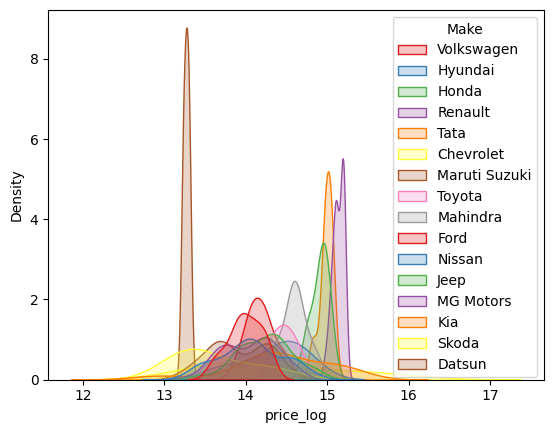

In [5]:
#summarize prices by brand of car
summary_by_make = cdf.groupby('Make')['price_log'].describe()
print(summary_by_make)

#grouped kernel density plot by 'Make' variable
sns.kdeplot(data=cdf, x='price_log', hue='Make', fill=True, common_norm=False, palette='Set1')

#Although a Skoda followed by Tata have the highest pricest overall, MG motors appears to be most consistently expensive based on this graph. Some makes have a wider range in prices while others are centered around the same price.

In [6]:
# 3 - Split the data into an 80% training set and a 20% testing set

from sklearn.model_selection import train_test_split

 #I just split the entire data frame

train_data, test_data = train_test_split(cdf, test_size=0.2, random_state=42)

# Display the training set
print("Training Set:")
print(train_data)



Training Set:
     Unnamed: 0           Make  Make_Year   Color  Body_Type  Mileage_Run  \
679         680        Renault       2018    grey        suv        18005   
625         626  Maruti Suzuki       2013   white  hatchback        47642   
33           34        Hyundai       2021     red  hatchback        13389   
31           32          Honda       2013   white      sedan        10651   
883         884        Hyundai       2017     red      sedan        36208   
..          ...            ...        ...     ...        ...          ...   
106         107     Volkswagen       2014  silver      sedan        68269   
270         271        Hyundai       2021    grey  hatchback        27185   
860         861        Hyundai       2020     red        suv        12699   
435         436  Maruti Suzuki       2017    grey  hatchback        84623   
102         103  Maruti Suzuki       2017    blue      sedan        36922   

    No_of_Owners  Seating_Capacity Fuel_Type Transmission Tra

In [7]:
# 4 - Linear Model first - Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the test set?
from sklearn.linear_model import LinearRegression #fromchatgpt
from sklearn.metrics import mean_squared_error, r2_score

numeric_variables = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']

train_data, test_data = train_test_split(cdf, test_size=0.2, random_state=42)


# Separate features (X) and target variable (y) for training set
X_train = train_data[numeric_variables]
y_train = train_data['price_log']

# Separate features (X) and target variable (y) for testing set
X_test = test_data[numeric_variables]
y_test = test_data['price_log']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Display the regression coefficients
print("\nRegression Coefficients:")
for feature, coef in zip(numeric_variables, model.coef_):
    print(f"{feature}: {coef}")

#coefficient of determination
print(f"Coefficient of Determination (R²): {r2}")

#The r^2 value is .3788 and the RMSE is .3441 on the test set


Mean Squared Error: 0.11845036910571903
Root Mean Squared Error: 0.3441661940192834

Regression Coefficients:
Make_Year: 0.12108991294458785
Mileage_Run: 4.755287916585778e-06
Seating_Capacity: 0.0961288526047476
Coefficient of Determination (R²): 0.37887654254491065


In [8]:
# Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables;
#what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set?

categorical_variables = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# With sklearn:
from sklearn.preprocessing import LabelBinarizer

# Create an instance of LabelBinarizer for each categorical variable
lb_make = LabelBinarizer()
lb_color = LabelBinarizer()
lb_body_type = LabelBinarizer()
lb_transmission = LabelBinarizer()
lb_fuel_type = LabelBinarizer()
lb_transmission_type = LabelBinarizer()

# Apply the label binarizer to each categorical variable
encoded_make = lb_make.fit_transform(cdf['Make'])
encoded_color = lb_color.fit_transform(cdf['Color'])
encoded_body_type = lb_body_type.fit_transform(cdf['Body_Type'])
encoded_transmission = lb_transmission.fit_transform(cdf['Transmission'])
encoded_fuel_type = lb_fuel_type.fit_transform(cdf['Fuel_Type'])
encoded_transmission_type = lb_transmission_type.fit_transform(cdf['Transmission_Type'])

# Reshape the encoded variables to be 1D
encoded_make = encoded_make[:, 0]
encoded_color = encoded_color[:, 0]
encoded_body_type = encoded_body_type[:, 0]
encoded_transmission = encoded_transmission[:, 0]
encoded_fuel_type = encoded_fuel_type[:, 0]
encoded_transmission_type = encoded_transmission_type[:, 0]

price_log = cdf['price_log']
Make_Year = cdf['Make_Year']
Mileage_Run = cdf['Mileage_Run']
Seating_Capacity = cdf['Seating_Capacity']

cdf_encoded = pd.DataFrame({'Make': encoded_make,'Color': encoded_color, 'Body_Type': encoded_body_type, 'Transmission': encoded_transmission, 'Fuel_Type': encoded_fuel_type, 'Transmission_Type': encoded_transmission_type, 'price_log': price_log, 'Make_Year' : Make_Year, 'Mileage_Run' : Mileage_Run, 'Seating_Capacity' : Seating_Capacity})

#model with one-hot encoded variables and price

encodedvars = ['Make', 'Color', 'Body_Type', 'Transmission', 'Fuel_Type', 'Transmission_Type']

train_data, test_data = train_test_split(cdf_encoded, test_size=0.2, random_state=42)


# Separate features (X) and target variable (y) for training set
X_train2 = train_data[encodedvars]
y_train2 = train_data['price_log']

# Separate features (X) and target variable (y) for testing set
X_test2 = test_data[encodedvars]
y_test2 = test_data['price_log']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train2, y_train2)

# Make predictions on the testing set
y_pred2 = model.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse)
r2_secondmodel = r2_score(y_test2, y_pred2)

print(f"Mean Squared Error: {mse2}")
print(f"Root Mean Squared Error: {rmse2}")

# Display the regression coefficients
print("\nRegression Coefficients:")
for feature, coef in zip(encodedvars, model.coef_):
    print(f"{feature}: {coef}")

#coefficient of determination
print(f"Coefficient of Determination (R²): {r2_secondmodel}")


Mean Squared Error: 0.15781902138855822
Root Mean Squared Error: 0.3441661940192834

Regression Coefficients:
Make: -0.6437628496518253
Color: -0.22157958742479256
Body_Type: 0.03218602132313874
Transmission: -0.18591209793603847
Fuel_Type: 0.4655022935637494
Transmission_Type: -0.2169101543734318
Coefficient of Determination (R²): 0.17243739333939212


In [9]:
# The Coefficient of Determination (R^2) for this data set is .1724 which is pretty low. The RMSE is .3441, which is the same as for the other model.
# This model performs worse than the numerical first model as the coefficient of determination is lower.

In [10]:
# Make a third model that combines all the regressors from the previous two;
# what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

allregressors = ['Make', 'Color', 'Body_Type', 'Transmission', 'Fuel_Type', 'Transmission_Type','Make_Year', 'Mileage_Run', 'Seating_Capacity']

train_data, test_data = train_test_split(cdf_encoded, test_size=0.2, random_state=42)


# Separate features (X) and target variable (y) for training set
X_train3 = train_data[allregressors]
y_train3 = train_data['price_log']

# Separate features (X) and target variable (y) for testing set
X_test3 = test_data[allregressors]
y_test3 = test_data['price_log']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train3, y_train3)

# Make predictions on the testing set
y_pred3 = model.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = np.sqrt(mse3)
r2_thirdmodel = r2_score(y_test3, y_pred3)

print(f"Mean Squared Error: {mse3}")
print(f"Root Mean Squared Error: {rmse3}")

# Display the regression coefficients
print("\nRegression Coefficients:")
for feature, coef in zip(allregressors, model.coef_):
    print(f"{feature}: {coef}")

#coefficient of determination
print(f"Coefficient of Determination (R²): {r2_thirdmodel}")

Mean Squared Error: 0.0989475723374081
Root Mean Squared Error: 0.3145593303931837

Regression Coefficients:
Make: -0.32165641292827135
Color: -0.07258031086168978
Body_Type: 0.018755578040963353
Transmission: -0.03367762130462065
Fuel_Type: 0.4187547781074163
Transmission_Type: -0.14939307327920262
Make_Year: 0.10027080657401953
Mileage_Run: 1.4035593851741135e-06
Seating_Capacity: 0.041773653613739865
Coefficient of Determination (R²): 0.4811442235173996


In [11]:
# The coefficient of determination (R^2) is .4811. The RMSE is .314559.
# Therefore, the joint model performs better than the other two as it has the highest coefficient of determination.
# I would say it performs significantly better than the model built just from categorical variables and just a little better than the first numerical model.
# However, none of the models perform great.

In [12]:
# Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables.
# As you increase the degree of the expansion, how do the  𝑅2  and RMSE change?
# At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE?
# How does it compare to your best model from part 3?

from sklearn.preprocessing import PolynomialFeatures

X = cdf_encoded

expander = PolynomialFeatures(degree=2, include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()



,Make,Color,Body_Type,Transmission,Fuel_Type,Transmission_Type,price_log,Make_Year,Mileage_Run,Seating_Capacity,...,price_log^2,price_log Make_Year,price_log Mileage_Run,price_log Seating_Capacity,Make_Year^2,Make_Year Mileage_Run,Make_Year Seating_Capacity,Mileage_Run^2,Mileage_Run Seating_Capacity,Seating_Capacity^2
0,0.0,0.0,0.0,0.0,1.0,0.0,14.088586,2017.0,44611.0,5.0,...,198.488269,28416.678926,628505.931371,70.442932,4068289.0,89980387.0,10085.0,1.990141e+09,223055.0,25.0
1,0.0,0.0,1.0,0.0,0.0,1.0,14.125932,2016.0,20305.0,5.0,...,199.541958,28477.879149,286827.051644,70.629661,4064256.0,40934880.0,10080.0,4.122930e+08,101525.0,25.0
2,0.0,0.0,0.0,0.0,0.0,1.0,14.276726,2019.0,29540.0,5.0,...,203.824896,28824.709150,421734.476622,71.383628,4076361.0,59641260.0,10095.0,8.726116e+08,147700.0,25.0
3,0.0,0.0,0.0,0.0,0.0,1.0,13.626768,2017.0,35680.0,5.0,...,185.688818,27485.191930,486203.097703,68.133842,4068289.0,71966560.0,10085.0,1.273062e+09,178400.0,25.0
4,0.0,0.0,0.0,0.0,0.0,1.0,13.845069,2017.0,25126.0,5.0,...,191.685946,27925.504900,347871.212745,69.225347,4068289.0,50679142.0,10085.0,6.313159e+08,125630.0,25.0


In [13]:
train_data, test_data = train_test_split(zdf, test_size=0.2, random_state=42)

vars = zdf.columns

# Separate features (X) and target variable (y) for training set
X_train4 = train_data[vars]
y_train4 = train_data['price_log']

# Separate features (X) and target variable (y) for testing set
X_test4 = test_data[vars]
y_test4 = test_data['price_log']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train4, y_train4)

# Make predictions on the testing set
y_pred4 = model.predict(X_test4)

# Evaluate the model
mse4 = mean_squared_error(y_test4, y_pred4)
rmse4 = np.sqrt(mse4)
r2_fourthmodel = r2_score(y_test4, y_pred4)

print(f"Mean Squared Error: {mse4}")
print(f"Root Mean Squared Error: {rmse4}")

#coefficient of determination
print(f"Coefficient of Determination (R²): {r2_fourthmodel}")

Mean Squared Error: 2.799572321853781e-10
Root Mean Squared Error: 1.6731922548989346e-05
Coefficient of Determination (R²): 0.9999999985319759


In [14]:
# As I increase the degree of expansion, the R^2 decreases and the RMSE increases.
# At expander 8, the R^2 goes negative (-1.61).
# For my best model, the R^2 is .999 and the RMSE is 1.63e-5. This is way better than my previous (almost too good).

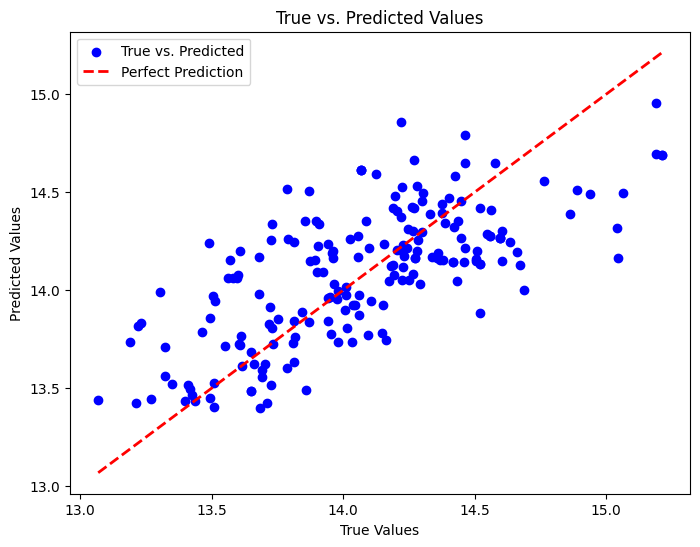

In [15]:
# For your best model so far, determine the predicted values for the test data and plot them against the true values.
# Do the predicted values and true values roughly line up along the diagonal, or not?
# Compute the residuals/errors for the test data and create a kernel density plot.
# Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

plt.figure(figsize=(8, 6))
plt.scatter(y_test3, y_pred3, c='blue', marker='o', label='True vs. Predicted')
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], c='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

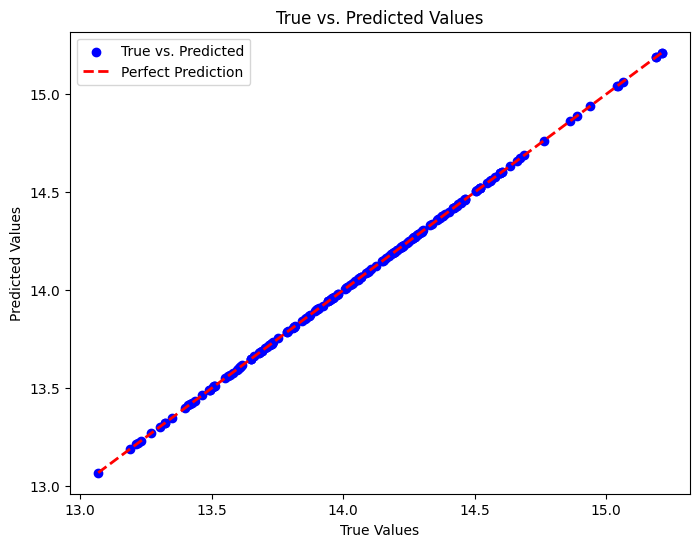

In [16]:
# I'm making a plot for my third and fourth model, because my fourth model is almost too predictive with R^2 being basically 1.

plt.figure(figsize=(8, 6))
plt.scatter(y_test4, y_pred4, c='blue', marker='o', label='True vs. Predicted')
plt.plot([min(y_test4), max(y_test4)], [min(y_test4), max(y_test4)], c='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

# In this plot, the predicted and true values line up along the diagonal almost perfectly.

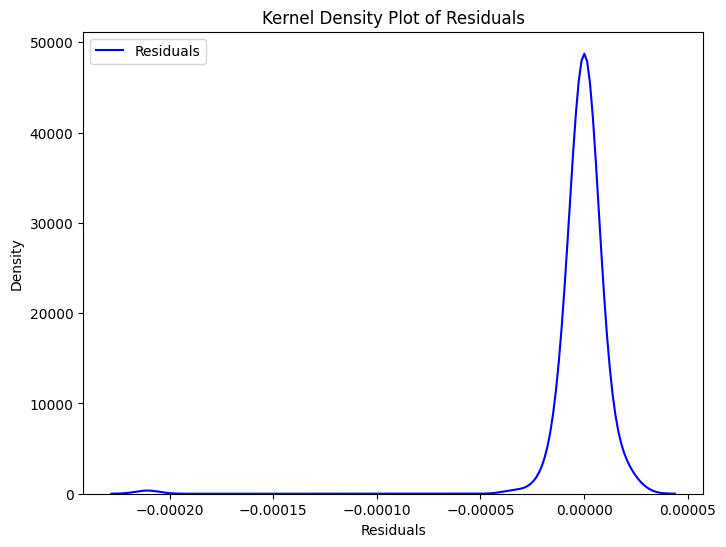

In [17]:
# def slr(x,y): # Single Linear Regression Function
#     x_bar = np.mean(x) # Average of x's
#     y_bar = np.mean(y) # Average of y's
#     b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x) # Slope coefficient
#     b0 = y_bar - b1*x_bar # Intercept coefficient
#     y_hat = b0 + b1*x   # Compute predictions
#     residuals = y - y_hat   # Compute residuals
#     return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

# print(slr(y_test4, y_pred4))

# Calculate the residuals (errors)
residuals = y_test4 - y_pred4

# Create a kernel density plot for residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', label='Residuals')
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.legend()
plt.show()

#Yes the kernel density plot appears to be roughly bell-shaped around 0. The model seems to be very strong. However, it's almost too predictive at this point which raises some concerns. I'm slightly confused about how the coefficient of determination shot up so much after just expanding the dataset to the power of 2.

In [18]:
# Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data.
# Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  𝑅2  and RMSE on the test set of a variety of depths.
# What depth tree gives the best results?

from sklearn import tree # Import the tree classifier
from sklearn.tree import DecisionTreeRegressor # import tree regressor

# Create a Decision Tree Regressor
regression_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regression_tree.fit(X_train4, y_train4)

# This next chunk of code is from chatGPT

# Vary the maximum depth and compute R² and RMSE for each depth
max_depths = [1, 2, 3, 4, 5]  # Adjust the depths as needed
r2_scores = []
rmse_scores = []

for max_depth in max_depths:
    # Create a Decision Tree Regressor with the specified max depth
    regression_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    regression_tree.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regression_tree.predict(X_test)

    # Compute R² and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2_scores.append(r2)
    rmse_scores.append(rmse)

    print(f"Max Depth = {max_depth}:")
    print(f"R² Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print()

# Display R² and RMSE scores for each max depth
for depth, r2, rmse in zip(max_depths, r2_scores, rmse_scores):
    print(f"Max Depth = {depth}:")
    print(f"R² Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print()

# Max Depth 4 has the best results.



Max Depth = 1:
R² Score: 0.2793
Root Mean Squared Error (RMSE): 0.3707

Max Depth = 2:
R² Score: 0.3290
Root Mean Squared Error (RMSE): 0.3577

Max Depth = 3:
R² Score: 0.4090
Root Mean Squared Error (RMSE): 0.3357

Max Depth = 4:
R² Score: 0.4270
Root Mean Squared Error (RMSE): 0.3306

Max Depth = 5:
R² Score: 0.4110
Root Mean Squared Error (RMSE): 0.3352

Max Depth = 1:
R² Score: 0.2793
Root Mean Squared Error (RMSE): 0.3707

Max Depth = 2:
R² Score: 0.3290
Root Mean Squared Error (RMSE): 0.3577

Max Depth = 3:
R² Score: 0.4090
Root Mean Squared Error (RMSE): 0.3357

Max Depth = 4:
R² Score: 0.4270
Root Mean Squared Error (RMSE): 0.3306

Max Depth = 5:
R² Score: 0.4110
Root Mean Squared Error (RMSE): 0.3352



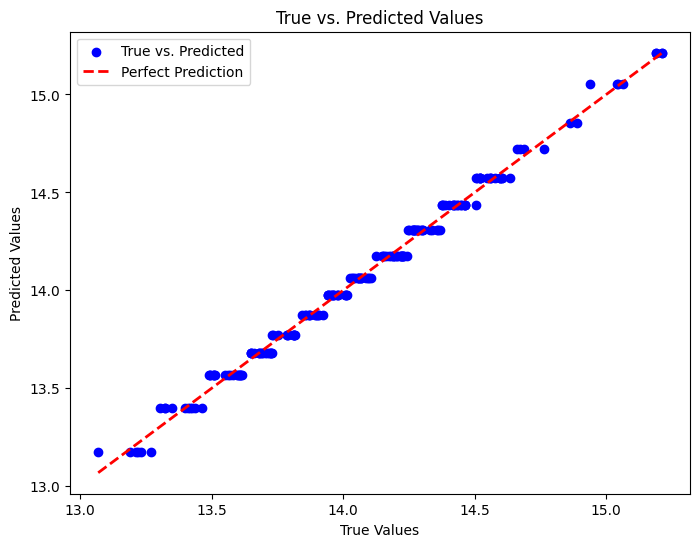

In [19]:
# For your best tree, determine the predicted values for the test data, and plot them against the true values.
# Do the predicted values and true values line up along the diagonal, or not?
# Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

# Create a Decision Tree Regressor with the best hyperparameters
best_regression_tree = DecisionTreeRegressor(max_depth=4, random_state=42)  # Replace with your best hyperparameters

# Fit the model to the training data
best_regression_tree.fit(X_train4, y_train4)

# Use the trained model to make predictions on the test data
y_pred4 = best_regression_tree.predict(X_test4)

# Create a scatter plot of predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test4, y_pred4, c='blue', marker='o', label='True vs. Predicted')
plt.plot([min(y_test4), max(y_test4)], [min(y_test4), max(y_test4)], c='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

#The predicted values and true values don't line up perfectly amongst the diagonal but they line up fairly well.


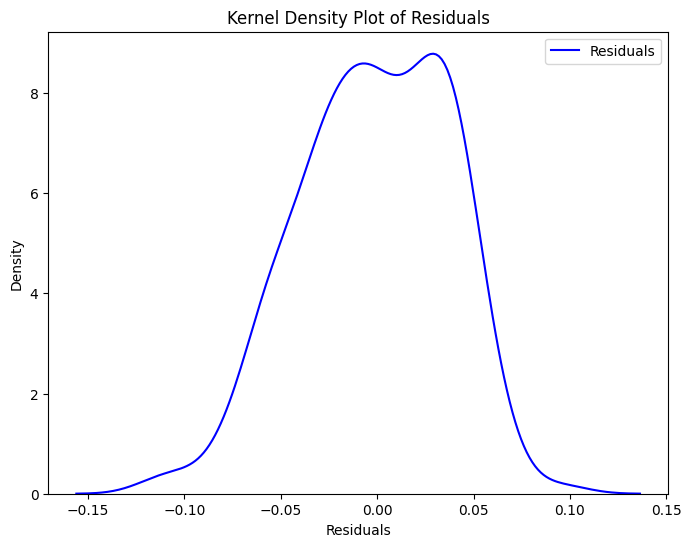

In [20]:
# Calculate the residuals (errors) for tree
residualstree = y_test4 - y_pred4

# Create a kernel density plot for residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residualstree, color='blue', label='Residuals')
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.legend()
plt.show()

# The residuals look almost bell shaped around zero except for the divet in the center.

In [21]:
# 1.9 Which model --- linear model or classification and regression tree --- has better performance on the test set?
# Overall, the linear regression model has better performance on this test set.

1.9 Which model --- linear model or classification and regression tree --- has better performance on the test set?
Overall, the linear regression model has better performance on this test set.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

   Unnamed: 0  Rating                    Size                        Sector  \
0           1     3.8   501 to 1000 employees           Aerospace & Defense   
1           2     3.4        10000+ employees                   Health Care   
2           3     4.8   501 to 1000 employees             Business Services   
3           4     3.8  1001 to 5000 employees  Oil, Gas, Energy & Utilities   
4           5     2.9     51 to 200 employees             Business Services   

   avg_salary job_state  
0        72.0        NM  
1        87.5        MD  
2        85.0        FL  
3        76.5        WA  
4       114.5        NY  
(731, 6)
['Unnamed: 0', 'Rating', 'Size', 'Sector', 'avg_salary', 'job_state']
Unnamed: 0      int64
Rating        float64
Size           object
Sector         object
avg_salary    float64
job_state      object
dtype: object
After coercion: 
 count    731.000000
mean       3.688372
std        0.570353
min        1.900000
25%        3.300000
50%        3.700000
75%   

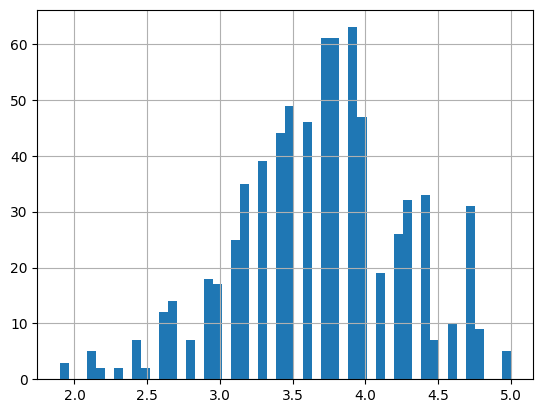

In [40]:
# 2.1 Load the wages_hw.csv file.

wdf = pd.read_csv('./assignment4/data/wages_hw.csv')

print(wdf.head())
print(wdf.shape) #look at dimensions
print(wdf.columns.tolist()) #summarize variables
print(wdf.dtypes) #summarize variable datatypes

# How to create a missing value dummy:
wdf['Rating'+'_nan'] = wdf['Rating'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', wdf['Rating'].describe(),'\n') # Describe the numeric variable
wdf['Rating'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(wdf['Rating'+'_nan']),'\n') # How many missing values are there? # zero missings

print(wdf['Size'].unique(),'\n') #There are some 'unknown' sized companies which is not good.
# Specify the value you want to count
value_to_count = 'Unknown'
# Use conditional filtering to count the occurrences of the specific value
count = (wdf['Size'] == value_to_count).sum()
print(f"Number of data points with value '{value_to_count}' for 'Size': {count}") #appears to be only 2 unknowns

print(wdf['Sector'].unique(),'\n') # No Unknowns
print(wdf['avg_salary'].unique(),'\n') # No Unknowns

#Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.

train_data, test_data = train_test_split(wdf, test_size=0.2, random_state=42)

In [ ]:
# Having issues converting the categorical variable to numeric using one-hot encoding so for the sake of time I'm going to do question 5 instead.

In [41]:
# 2.2 Use a linear model to regress avg_salary on Sector.
# Which sectors have the highest predicted wages? What is the  𝑅2  and RMSE on the test set?

# Sector is a categorical variable so first I have to one-hot encode it so I can use it

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Sector' variable
encoder = OneHotEncoder(sparse=False)
encoded_sector = encoder.fit_transform(wdf[['Sector']])

# Create a new DataFrame with one-hot encoded features
encoded_df = pd.DataFrame(encoded_sector, columns=encoder.get_feature_names_out(['Sector']))

# Merge the one-hot encoded DataFrame with the 'avg_salary' column
final_df = pd.concat([wdf['avg_salary'], encoded_df], axis=1)

# Separate the features (X) and target variable (y)
X = final_df.drop(columns='avg_salary')
y = final_df['avg_salary']

train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

encoded_sector = final_df['encoded_sector']
avg_salary = final_df['avg_salary']

# Separate features (X) and target variable (y) for training set
X_train5 = train_data['encoded_sector']
y_train5 = train_data['avg_salary']

# Separate features (X) and target variable (y) for testing set
X_test5 = test_data['encoded_sector']
y_test5 = test_data['avg_salary']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train5, y_train5)

# Make predictions on the testing set
y_pred = model.predict(X_test5)

# Evaluate the model
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
r2 = r2_score(y_test5, y_pred5)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


#coefficient of determination
print(f"Coefficient of Determination (R²): {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyError: ignored

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

In [ ]:
# 5.1-5.3 : derivatives, solving, and substitutions as shown above

# 5.4 : When will  𝑏∗  be large or small, depending on the relationship between  𝑥  and  𝑦  and the amount of "noise"/variance in  𝑥 ? What does  𝑎∗  represent?
# b* will be large when the covariance between x and y is greater than the amount of noise or variance in x. b* will be small under the opposite conditions or when the covariance between x and y is less than the variance in x.
# a* represents the true population intercept.

# 5.5: Suppose you have measurement error in  𝑥  which artificially inflates its variance (e.g. bad data cleaning). What happens to the  𝑏∗  coefficient?
# How will affect your ability to predict? (This phenomenon is called attenuation.)
# If there is measurement error in x, then the b* value will decrease. This will decrease the reliability of our predictions overall, leading to inaccurate conclusions.

# 5.6: If values for some extreme observations are exerting significant influence over the coefficients, the model will not perform as well for more average observations as these values will skew the estimated regression coefficients towards itself.
# Rather, the values for extreme observations may distort the predicted slope and intercept of the linear regression model. These changes will lead to less accurate predictions.